In [1]:
import pandas as pd
import matplotlib .pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_error
import seaborn as sns



In [2]:
df=pd.read_csv('diesel.csv')
df

,city,date,rate,state
0,Agartala,2012-10-27,46.93,Tripura
1,Agartala,2013-01-18,47.45,Tripura
2,Agartala,2013-02-16,47.96,Tripura
3,Agartala,2013-03-23,47.46,Tripura
4,Agartala,2013-04-01,48.47,Tripura
...,...,...,...,...
17230,Varanasi,2020-12-27,74.84,Uttar Pradesh
17231,Varanasi,2020-12-28,74.84,Uttar Pradesh
17232,Varanasi,2020-12-29,74.84,Uttar Pradesh
17233,Varanasi,2020-12-30,74.84,Uttar Pradesh


In [3]:
df.head(5)

,city,date,rate,state
0,Agartala,2012-10-27,46.93,Tripura
1,Agartala,2013-01-18,47.45,Tripura
2,Agartala,2013-02-16,47.96,Tripura
3,Agartala,2013-03-23,47.46,Tripura
4,Agartala,2013-04-01,48.47,Tripura


In [13]:
df.tail(5)

,city,date,rate,state,year
17230,Varanasi,2020-12-27,74.84,Uttar Pradesh,2020
17231,Varanasi,2020-12-28,74.84,Uttar Pradesh,2020
17232,Varanasi,2020-12-29,74.84,Uttar Pradesh,2020
17233,Varanasi,2020-12-30,74.84,Uttar Pradesh,2020
17234,Varanasi,2020-12-31,74.84,Uttar Pradesh,2020


In [15]:
df.isnull()

,city,date,rate,state,year
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
17230,False,False,False,False,False
17231,False,False,False,False,False
17232,False,False,False,False,False
17233,False,False,False,False,False


In [16]:
df.isnull().sum()

,0
city,0
date,0
rate,0
state,0
year,0


In [18]:
df.shape

(17235, 5)

In [19]:
df.size

86175

In [20]:
df.empty

False

In [22]:
df.columns

Index(['city', 'date', 'rate', 'state', 'year'], dtype='object')

In [23]:
df.index

RangeIndex(start=0, stop=17235, step=1)

In [25]:
df.count()

,0
city,17235
date,17235
rate,17235
state,17235
year,17235


In [26]:
df.dropna()

,city,date,rate,state,year
0,Agartala,2012-10-27,46.93,Tripura,2012
1,Agartala,2013-01-18,47.45,Tripura,2013
2,Agartala,2013-02-16,47.96,Tripura,2013
3,Agartala,2013-03-23,47.46,Tripura,2013
4,Agartala,2013-04-01,48.47,Tripura,2013
...,...,...,...,...,...
17230,Varanasi,2020-12-27,74.84,Uttar Pradesh,2020
17231,Varanasi,2020-12-28,74.84,Uttar Pradesh,2020
17232,Varanasi,2020-12-29,74.84,Uttar Pradesh,2020
17233,Varanasi,2020-12-30,74.84,Uttar Pradesh,2020


In [27]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
17230,False
17231,False
17232,False
17233,False


In [4]:
pd.to_datetime(df['date']).dt.year
df['year']=pd.to_datetime(df['date']).dt.year
df

,city,date,rate,state,year
0,Agartala,2012-10-27,46.93,Tripura,2012
1,Agartala,2013-01-18,47.45,Tripura,2013
2,Agartala,2013-02-16,47.96,Tripura,2013
3,Agartala,2013-03-23,47.46,Tripura,2013
4,Agartala,2013-04-01,48.47,Tripura,2013
...,...,...,...,...,...
17230,Varanasi,2020-12-27,74.84,Uttar Pradesh,2020
17231,Varanasi,2020-12-28,74.84,Uttar Pradesh,2020
17232,Varanasi,2020-12-29,74.84,Uttar Pradesh,2020
17233,Varanasi,2020-12-30,74.84,Uttar Pradesh,2020


In [5]:
X=df[['year']]
Y=df[['rate']]

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [7]:
X_train,X_test
Y_train,Y_test

(        rate
 4939   62.09
 3472   65.94
 534    66.79
 6514   66.29
 5082   77.58
 ...      ...
 7813   74.96
 10955  61.26
 5192   69.63
 12172  67.19
 235    68.27
 
 [13788 rows x 1 columns],
         rate
 12689  59.32
 2621   57.74
 4994   66.70
 4834   75.98
 8307   54.81
 ...      ...
 9935   59.46
 1520   60.48
 13795  66.93
 10101  70.66
 6824   69.43
 
 [3447 rows x 1 columns])

In [8]:
MODEL=LinearRegression()
MODEL.fit(X_train,Y_train)
Pred=MODEL.predict(X_test)

In [9]:
coefficients=MODEL.coef_
intercept=MODEL.intercept_
print(coefficients)
print(intercept)

[[2.82514316]]
[-5635.91044847]


In [10]:
mse=mean_squared_error(Y_test,Pred)
rmse=root_mean_squared_error(Y_test,Pred)
mae=mean_absolute_error(Y_test,Pred)
r2=r2_score(Y_test,Pred)

In [11]:
print('MSE:',mse)
print('RMSE:',rmse)
print('MAE:',mae)
print('R2:',r2)

MSE: 37.505633211236024
RMSE: 6.124184289457333
MAE: 4.778966235510822
R2: 0.5027340800830769


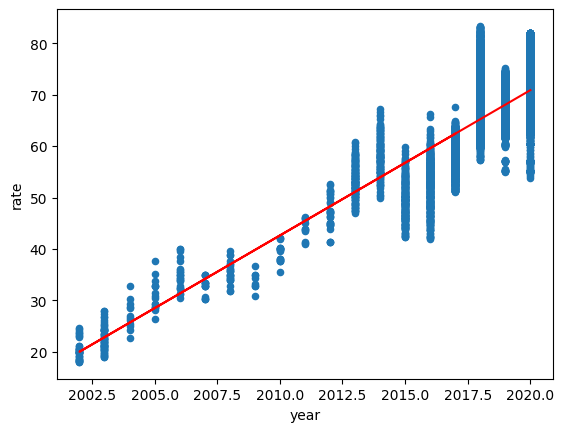

In [12]:
df.plot(kind='scatter',x='year',y='rate')
plt.plot(X_test,Pred,color='red')
plt.show()

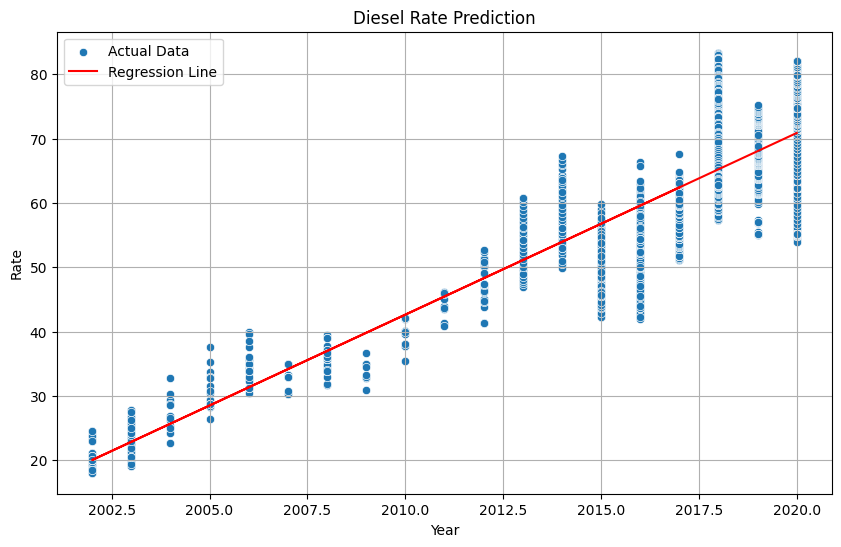

In [29]:
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='year', y='rate', data=df, label='Actual Data')
plt.plot(X_test, Pred, color='red', label='Regression Line')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.title('Diesel Rate Prediction')
plt.legend()
plt.grid(True)
plt.show()


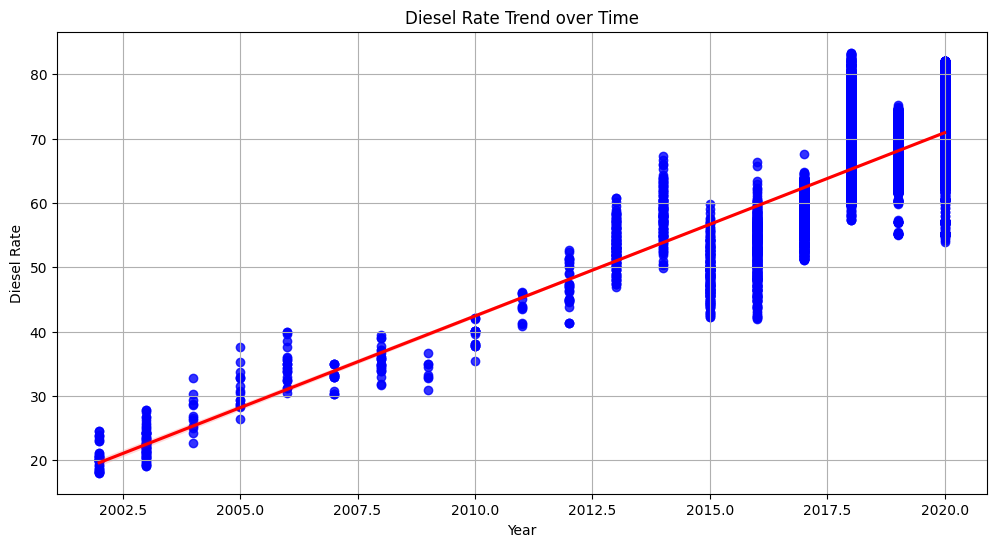

In [31]:


plt.figure(figsize=(12, 6))
sns.regplot(x='year', y='rate', data=df, color='blue', line_kws={'color': 'red'})
plt.xlabel('Year')
plt.ylabel('Diesel Rate')
plt.title('Diesel Rate Trend over Time')
plt.grid(True)
plt.show()